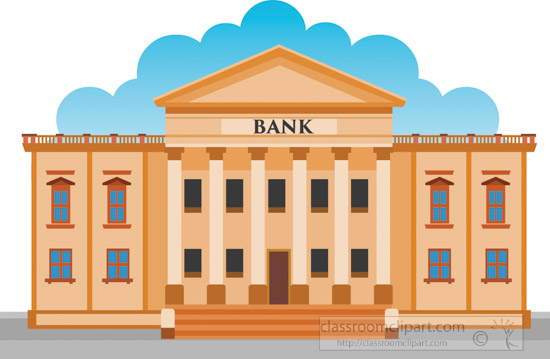

# Credit Risk Modelling in Python

Credit risk is the possibility that a borrower will not be able to make timely payments and will default on their debt. It refers to the possibility that a lender may not get the interest or principle due to them on time.

Credit risk is a very important factor for banks and family organizations. For this reason, it is vital to know whether or not a client can return the money that has been lent to them.

  Machine Learning Models have helped these companies in improving the accuracy of their credit risk analysis by giving a scientific technique for predicting potential debtors.
  
  In this project, first the data is pre-processed, the risk of default is visualized with the other variables, then a Machine Learning exercise is carried out with 3 algorithms to see which one can best explain the model.
 Subsequently, the optimal parameters are searched to find the best model.
 Finally it is assessed with cross-validation.
  

### Importing the libraries and reading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data

credit_risk = pd.read_csv('C:/UCI_credit_card.csv')
credit_risk.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


- ID: ID of each client.
- LIMIT_BAL : Amount of given credit in NT dollars (includes individual and family/suplementary credit.
- Sex: gender (1=male, 2=female)
- Education (1=graduate school, 2= university, 3=high school, 4=others, 5=unkown, 6=unknown)
- Marriage: Marital stastus (1=married, 2=single, 3=others).
- Age: age in years.
- Pay_0: repayment status in September 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months and above)
- Pay_2: Repayment status in august 2005 (scale same as above).
- Pay_3: Repayment status in July 2005 (scale same as above).
- Pay_4: Repayment status in June 2005 (scale same as above).
- Pay_5: Repayment status in May 2005 (scale same as above).
- Pay_6: Repayment status in April 2005 (scale same as above).
- BILL_AMT2 : Amount of bill statement in august 2005 (NT dollar).
- BILL_AMT3 : Amount of bill statement in july 2005 (NT dollar).
- BILL_AMT4 : Amount of bill statement in June 2005 (NT dollar).
- BILL_AMT5 : Amount of bill statement in May 2005 (NT dollar).
- BILL_AMT6 : Amount of bill statement in April 2005 (NT dollar).
- PAY_AMT1: Amount of previous payment in september 2005 (NT dollar).
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar).
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar).
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar).
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar).
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [3]:
# Copying the original data in data frame called df.
df = credit_risk.copy()
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## 1. Data preparation and Pre-processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

check for duplicate items

In [5]:
df_clean = df.drop_duplicates()
if len(df_clean) == len(df):
    print("No duplicate elements")
else:
    print("Duplicate elements")

No duplicate elements


In [6]:
# deliting useless variable
df.drop(['ID'], axis = 1, inplace = True)

In [7]:
def estatistics_cont(num):
    # calculating describe:
    estatistics = num.describe().T
    # adding median:
    estatistics['median'] = num.median()
    # rearrange so that the median is next to the mean
    estatistics = estatistics.iloc[:,[0,1,8,2,3,4,5,6,7]]
    # return
    return(estatistics)

In [8]:
estatistics_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,140000.0,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,2.0,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,2.0,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,2.0,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,34.0,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,0.0,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,0.0,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,0.0,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,0.0,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,0.0,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [9]:
# checking for missing values
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [10]:
df['default.payment.next.month'].value_counts(normalize = True) * 100

0    77.88
1    22.12
Name: default.payment.next.month, dtype: float64

Text(0.5, 1.0, 'Target Distribution')

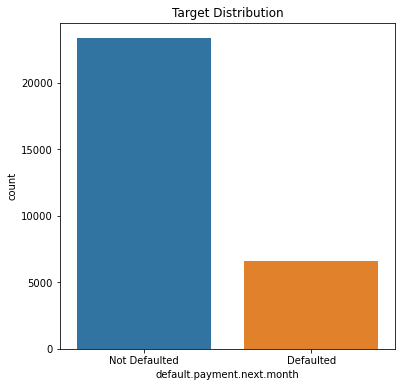

In [11]:
# Visualizing the target column "default.payment.next.month"
plt.figure(figsize=(6,6))
sns.countplot(df['default.payment.next.month'])
plt.xticks([0,1], labels = ['Not Defaulted','Defaulted'])
plt.title('Target Distribution')

As we can see, the number of not default clients is much greater than the default clients.

### Analysis of column 'EDUCATION'

Education = 1.graduate school, 2.university, 3.high school, 4.others, 5.unknown, 6.unknown

In [12]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [13]:
# changing 0,5 and 6 to keep it under 1 category
df['EDUCATION'].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1}, inplace = True)
df.EDUCATION.value_counts()

2    14030
1    10930
3     4917
4      123
Name: EDUCATION, dtype: int64

Text(0.5, 1.0, 'Education Distribution')

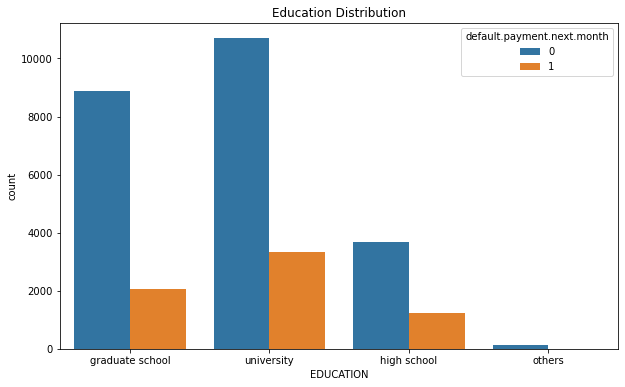

In [14]:
# education columns
# (1=graduate_school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
plt.figure(figsize=(10,6))
sns.countplot('EDUCATION', hue='default.payment.next.month', data=df)
plt.xticks([0,1,2,3], labels = ['graduate school','university', 'high school', 'others'])
plt.title('Education Distribution')

As we can see, the risk of default is greater in university, then graduate school and then high school.

###  Analysis of column 'MARRIAGE'

Marital status (1=married, 2=single, 3=others)

In [15]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [16]:
# Mapping 0 with 1
df['MARRIAGE'].replace({0:1,1:1,2:2,3:3}, inplace = True)
df['MARRIAGE'].value_counts()

2    15964
1    13713
3      323
Name: MARRIAGE, dtype: int64

Text(0.5, 1.0, 'Marriage Distribution')

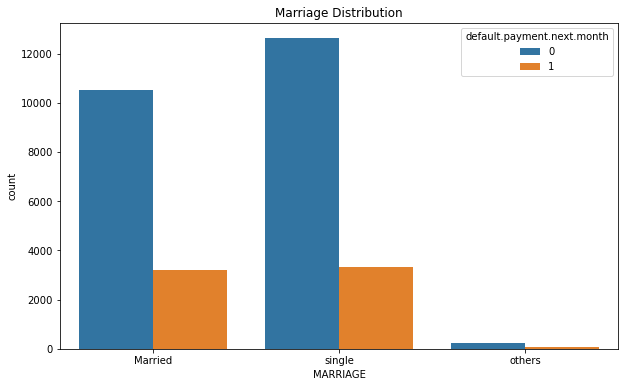

In [20]:
# with marriage columns
plt.figure(figsize=(10,6))
sns.countplot('MARRIAGE', hue = 'default.payment.next.month', data = df)
plt.xticks([0,1,2], labels = ['Married','single','others'])
plt.title('Marriage Distribution')

As we can see, married people and single people have practically the same default proportion.

###  Analysis of column 'AGE'

In [17]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

Text(0.5, 1.0, 'Age distribution')

<Figure size 720x432 with 0 Axes>

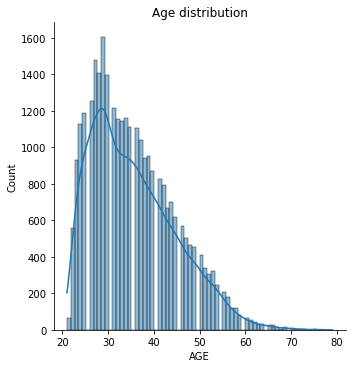

In [18]:
plt.figure(figsize=(10,6))
sns.displot(df['AGE'], kde = True)
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.title('Age distribution')

As we can see, the largest number of people who request loans are young people and as age increases the number decreases. On the other hand, it is logical because as you get older you have fewer years to be able to return the money, in life.

###  Analysis of column 'Gender Distribution'

Text(0.5, 1.0, 'Gender Distribution')

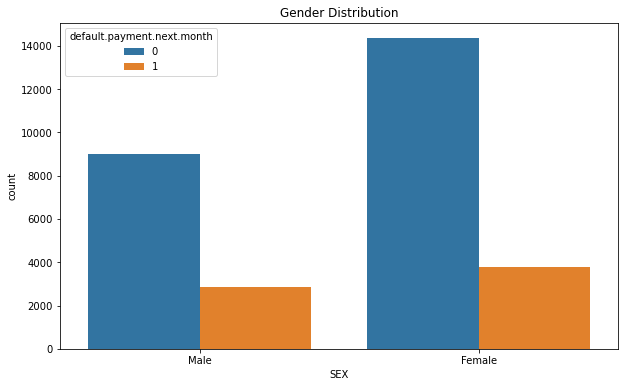

In [19]:
# Gender (1=male, 2=female)
plt.figure(figsize=(10,6))
sns.countplot('SEX', hue= 'default.payment.next.month', data =df)
plt.xticks([0,1], labels=['Male','Female'])
plt.title('Gender Distribution')

As we can see, there are more women than men who request loans and the proportion of defaults is somewhat higher in women than in men.

###  Analysis of column 'Limit_bal'

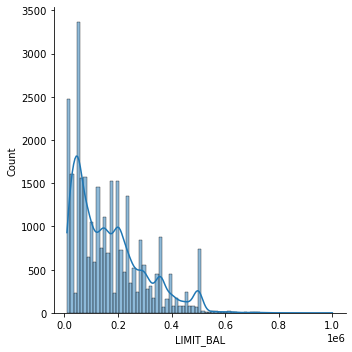

In [21]:
#with column 'limit_bal'
sns.displot(df.LIMIT_BAL, kde=True)

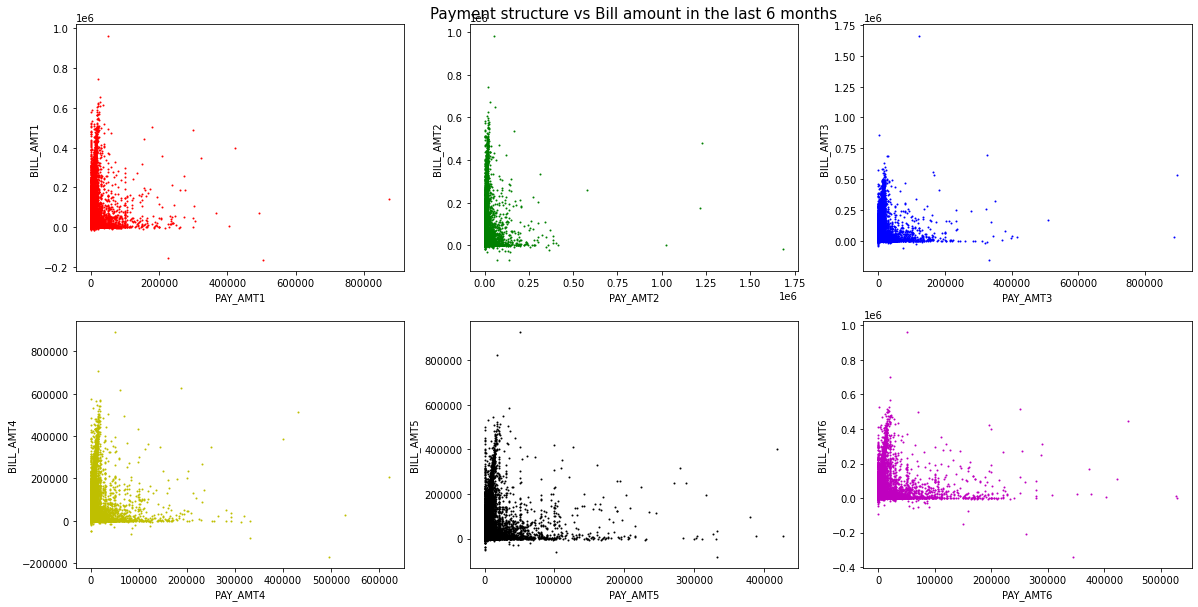

In [22]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()



## 2. Machine Learning

### Creating Independent features and depened features

In [23]:
# Independent features
X = df.drop(['default.payment.next.month'], axis=1)
# Dependent features
y = df['default.payment.next.month']
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


### Scaling features

In [24]:
# Applying scaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

### Train Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 30)

### Building Model

- Logistic Regression.
- Random Forest Classifier.
- XGBoost Classifier.

#### Logistic regression model

In [26]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [27]:
# Predicting the model
pred_logit = logit.predict(X_test)

##### Evaluation metrics

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve

print('The accuracy of logit model is:', accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

The accuracy of logit model is: 0.8128888888888889
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7064
           1       0.68      0.24      0.36      1936

    accuracy                           0.81      9000
   macro avg       0.75      0.61      0.63      9000
weighted avg       0.79      0.81      0.78      9000



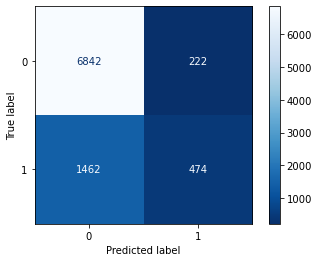

In [29]:
plot_confusion_matrix(logit,X_test, y_test, cmap='Blues_r')

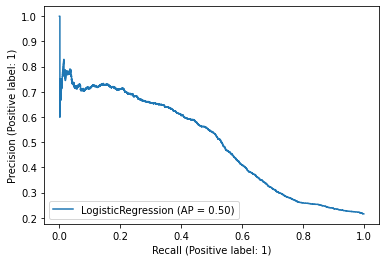

In [30]:
# plot roc_auc curve
plot_precision_recall_curve(logit,X_test,y_test)

### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
# Fitting the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# predicting the model
pred_rf = rf.predict(X_test)

##### Evaluating the model

In [33]:
print('The accuracy of logit model is: ', accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

The accuracy of logit model is:  0.8164444444444444
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7064
           1       0.62      0.37      0.47      1936

    accuracy                           0.82      9000
   macro avg       0.73      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



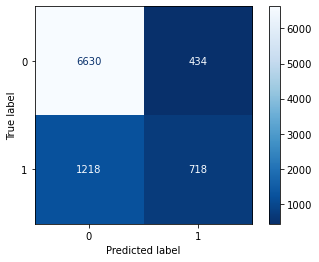

In [34]:
# plot confusion metrics
plot_confusion_matrix(rf, X_test, y_test, cmap='Blues_r')

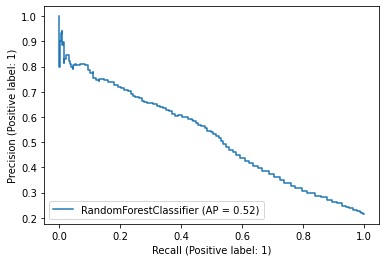

In [35]:
# plot ppricision_recall curve
plot_precision_recall_curve(rf,X_test, y_test)

### XGBoost Classifier

In [36]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
# fitting the model
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [37]:
# Predicting the model
xgb_predict = xgb_clf.predict(X_test)

##### Evaluating the model

In [38]:
print('The accuracy of logit model is:', accuracy_score(y_test, xgb_predict))
print(classification_report(y_test, xgb_predict))

The accuracy of logit model is: 0.8155555555555556
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7064
           1       0.62      0.37      0.46      1936

    accuracy                           0.82      9000
   macro avg       0.73      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



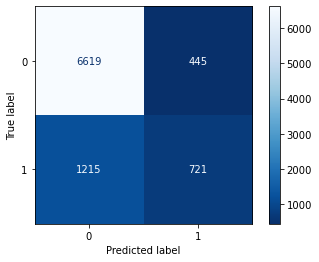

In [39]:
# Plot confusion metrics
plot_confusion_matrix(xgb_clf, X_test, y_test, cmap='Blues_r')

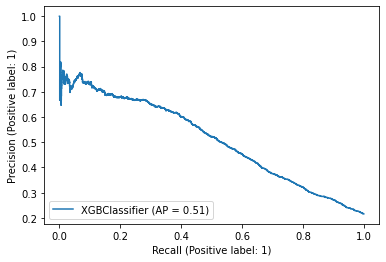

In [40]:
# plot pprcision_recall curve
plot_precision_recall_curve(xgb_clf, X_test, y_test)

| Algorithm | Accuracy | 
|---|---|
|Logistic Regression|0.81|
|Random Forest Classifier|0.82|
|XGBoostClassifier|0.82|

As we can see, the Random Forest Classifier and XGBoostClassifier algorithms are a little better than Logistic Regression, given that the XGBoostClassifier is a more modern algorithm than Random Forest, I am going to use it to optimize it.

### Hyperparameter tunning

In [41]:
# building parameters grid
param_grid = {
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

In [42]:
# Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [43]:
random_search = RandomizedSearchCV(xgb_clf,param_grid,scoring='roc_auc',n_jobs=1,cv=5,verbose=3, random_state = 0)

# fitting the RandomizedSearchCV
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=7.0, n_estimators=100, reg_lambda=10.0, subsample=0.7;, score=0.774 total time=   0.5s
[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=7.0, n_estimators=100, reg_lambda=10.0, subsample=0.7;, score=0.772 total time=   0.5s
[CV 3/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=7.0, n_estimators=100, reg_lambda=10.0, subsample=0.7;, score=0.774 total time=   0.5s
[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.5, learning_rate=0.001, max_depth=20, min_child_weight=7.0, n_estimators=100, reg_lambda=10.0, subsample=0.7;, score=0.774 total time=   0.5s
[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.5, learning_rate=0.001, max_depth=20, min

[CV 1/5] END colsample_bylevel=0.6, colsample_bytree=0.4, gamma=0.5, learning_rate=0, max_depth=6, min_child_weight=0.5, n_estimators=100, reg_lambda=1.0, subsample=0.8;, score=0.500 total time=   0.3s
[CV 2/5] END colsample_bylevel=0.6, colsample_bytree=0.4, gamma=0.5, learning_rate=0, max_depth=6, min_child_weight=0.5, n_estimators=100, reg_lambda=1.0, subsample=0.8;, score=0.500 total time=   0.3s
[CV 3/5] END colsample_bylevel=0.6, colsample_bytree=0.4, gamma=0.5, learning_rate=0, max_depth=6, min_child_weight=0.5, n_estimators=100, reg_lambda=1.0, subsample=0.8;, score=0.500 total time=   0.3s
[CV 4/5] END colsample_bylevel=0.6, colsample_bytree=0.4, gamma=0.5, learning_rate=0, max_depth=6, min_child_weight=0.5, n_estimators=100, reg_lambda=1.0, subsample=0.8;, score=0.500 total time=   0.3s
[CV 5/5] END colsample_bylevel=0.6, colsample_bytree=0.4, gamma=0.5, learning_rate=0, max_depth=6, min_child_weight=0.5, n_estimators=100, reg_lambda=1.0, subsample=0.8;, score=0.500 total tim

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300...
                   param_distributions={'colsample_bylevel': [0.4, 0.5, 0.6,
                                                             

In [44]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.25, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=0.5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [45]:
# showing the best params
random_search.best_params_

{'subsample': 1.0,
 'reg_lambda': 100.0,
 'n_estimators': 100,
 'min_child_weight': 0.5,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.25,
 'colsample_bytree': 0.4,
 'colsample_bylevel': 0.5}

In [46]:
# applying best params to the algorithm
classifier=xgb.XGBClassifier(objective='binary:logistic',
                                  subsample=1.0,
                                  reg_lambda=100.,
                                  n_estimators=100,
                                  min_child_weight=0.5,
                                  max_depth=10,
                                  learning_rate=0.1,
                                  gamma=0.25,
                                  colsample_bytree=0.4,
                                  colsample_bylevel=0.5)

# Fitting the model
classifier.fit(X_train,y_train)


# Predicting model
y_pred_proba= classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

In [47]:
credit_risk['scoring_default'] = classifier.predict_proba(df.drop(columns = 'default.payment.next.month'))[:,1]
credit_risk

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,scoring_default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.518164
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0.352212
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.262705
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.262705
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.262774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0.262705
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0.277874
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0.549132
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,0.269379


#### Evaluating the model after hyperparameter tuning

In [48]:
print('The accuracy of the model is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

The accuracy of the model is:  0.8201111111111111
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7064
           1       0.64      0.37      0.47      1936

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



As we can see, the model practically does not improve.

#### Cross Validation

In [49]:
# applying cross validation.
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

In [50]:
score

array([0.806     , 0.81033333, 0.81133333, 0.806     , 0.81733333,
       0.82633333, 0.83666667, 0.83      , 0.82533333, 0.82133333])

In [51]:
score.mean()

0.8190666666666667

To see if the model fits quite well and does not offer a better result than it should be.

In [52]:
# saving in excel data with riskDefaultScore
credit_risk.to_excel('riskDefaultScoring.xlsx')